# Dependencies

In [1]:
import os
import re
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from math import ceil
from sklearn.model_selection import train_test_split
import keras.backend as K
import albumentations as A

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# File balance checking

In [ ]:
# display list dataset
dataset_path = '/content/drive/MyDrive/SelfDrivingCar/Dataset'
os.listdir(dataset_path)

['annotations_prepped_test',
 'images_prepped_test',
 'annotations_prepped_train',
 'images_prepped_train']

In [3]:
# train image and annotation path
imageTrain_path = '/content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train'
annotationTrain_path = '/content/drive/MyDrive/SelfDrivingCar/Dataset/annotations_prepped_train'

# test image and annotation path
imageTest_path = '/content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_test'
annotationTest_path = '/content/drive/MyDrive/SelfDrivingCar/Dataset/annotations_prepped_test'

In [ ]:
# show lots of data train

# train
train_image_list = os.listdir(imageTrain_path)
total_image_train = len(train_image_list)

# annotation
train_anot_list = os.listdir(annotationTrain_path)
total_anot_train = len(train_anot_list)

print(f'Train Image Files: {total_image_train}\nTrain Anot Files: {total_anot_train}')

Train Image Files: 398
Train Anot Files: 367


> image and annotation file train isn't balance

In [4]:
# show lots of data test

# test
test_image_list = os.listdir(imageTest_path)
total_image_test = len(test_image_list)

# annotation
test_anot_list = os.listdir(annotationTest_path)
total_anot_test = len(test_anot_list)

print(f'Train Image Files: {total_image_test}\nTrain Anot Files: {total_anot_test}')

Train Image Files: 101
Train Anot Files: 101


> image and annotation file test is balance

# Find duplicated files

In [ ]:
def find_duplicate_files(files):
  # set up patern to see duplicate data
  pattern = re.compile(r'(.+?)\((\d+)\)(\..+)')
  matching_files = []

  # matching patern
  for file in files:
      match = pattern.match(file)
      if match:
          matching_files.append(file)

  return matching_files

In [ ]:
# Train Image
duplicates = find_duplicate_files(train_image_list)

if duplicates:
    print(f'Duplicate files is found:\n{duplicates}\nTotal: {len(duplicates)}')
else:
    print(f'No duplicate files is found')

Duplicate files is found:
['0006R0_f03840(1).png', '0006R0_f03750(1).png', '0006R0_f03810(1).png', '0006R0_f03780(1).png', '0006R0_f03720(1).png', '0006R0_f03600(1).png', '0006R0_f03630(1).png', '0006R0_f03660(1).png', '0006R0_f03690(1).png', '0006R0_f03930(1).png', '0016E5_05400(1).png', '0016E5_07680(2).png', '0016E5_07650(1).png', '0016E5_07650(2).png', '0016E5_07680(1).png', '0016E5_07620(2).png', '0016E5_07620(1).png', '0016E5_07920(2).png', '0016E5_07920(1).png', '0016E5_07860(2).png', '0016E5_07830(2).png', '0016E5_07830(1).png', '0016E5_07860(1).png', '0016E5_07800(2).png', '0016E5_07800(1).png', '0016E5_07770(1).png', '0016E5_07770(2).png', '0016E5_07740(2).png', '0016E5_07740(1).png', '0016E5_07710(2).png', '0016E5_07710(1).png']
Total: 31


In [ ]:
imageTrain_duplicate = duplicates # Save image train duplicate

In [ ]:
# Train Annotations
duplicates = find_duplicate_files(train_anot_list)

if duplicates:
    print(f'Duplicate files is found:\n{duplicates}\nTotal: {len(duplicates)}')
else:
    print(f'No duplicate files is found')

No duplicate files is found


In [ ]:
# Test Image
duplicates = find_duplicate_files(test_image_list)

if duplicates:
    print(f'Duplicate files is found:\n{duplicates}\nTotal: {len(duplicates)}')
else:
    print(f'No duplicate files is found')

No duplicate files is found


In [ ]:
# Test Annotations
duplicates = find_duplicate_files(test_anot_list)

if duplicates:
    print(f'Duplicate files is found:\n{duplicates}\nTotal: {len(duplicates)}')
else:
    print(f'No duplicate files is found')

No duplicate files is found


# Delete duplicated file

In [ ]:
def delete_duplicate_file(directory_path, files):
  for duplicate_file in files:
    file_path = os.path.join(directory_path, duplicate_file)

    # remove duplicate data
    try:
        os.remove(file_path)
        print(f'File {file_path} successfully removed')
    except OSError as e:
        print(f'Error removing {file_path}: {e.filename} - {e.strerror}')

In [ ]:
delete_duplicate_file(imageTrain_path, imageTrain_duplicate) # duplicate file is in original image data train

File /content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train/0006R0_f03840(1).png successfully removed
File /content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train/0006R0_f03750(1).png successfully removed
File /content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train/0006R0_f03810(1).png successfully removed
File /content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train/0006R0_f03780(1).png successfully removed
File /content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train/0006R0_f03720(1).png successfully removed
File /content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train/0006R0_f03600(1).png successfully removed
File /content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train/0006R0_f03630(1).png successfully removed
File /content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train/0006R0_f03660(1).png successfully removed
File /content/drive/MyDrive/SelfDrivingCar/Dataset/images_prepped_train/0006R0_f03690(1)

In [5]:
# Checking file balance

# train
train_image_list = os.listdir(imageTrain_path)
total_image_train = len(train_image_list)

# annotation
train_anot_list = os.listdir(annotationTrain_path)
total_anot_train = len(train_anot_list)

print(f'Train Image Files: {total_image_train}\nTrain Anot Files: {total_anot_train}')

Train Image Files: 367
Train Anot Files: 367


> now image and annotation file train is balance

# Checking content in original image with annotation

In [ ]:
# Train
if set(train_image_list) == set(train_anot_list):
    print("Train lists have the same content.")
else:
    print("Train Lists have different content.")

# Test
if set(test_image_list) == set(test_anot_list):
    print("Test lists have the same content.")
else:
    print("Test Lists have different content.")

Train lists have the same content.
Test lists have the same content.


# Show image and annotation dataset

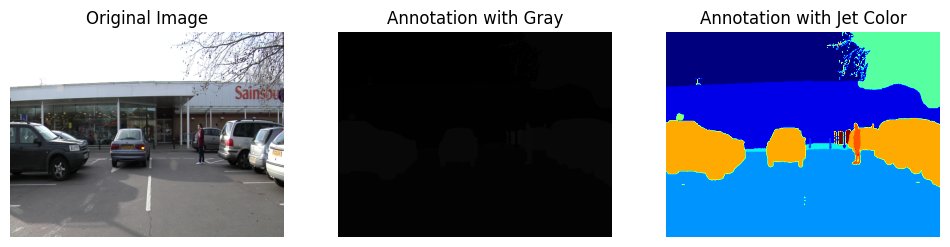

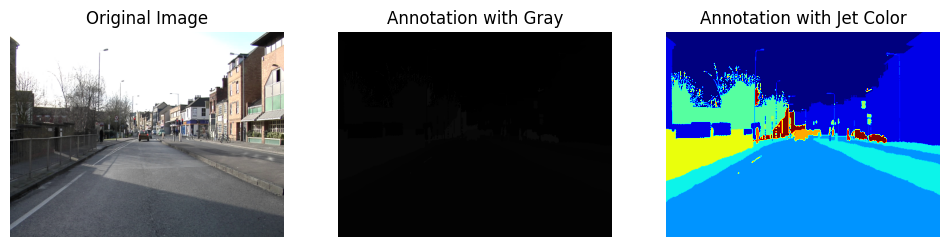

In [6]:
selected_image = train_image_list[:2]

for image_file in selected_image:
  # get image and annotation path
  image_path = os.path.join(imageTrain_path, image_file)
  annotation_path = os.path.join(annotationTrain_path, image_file)

  # read image and annotation
  image = cv2.imread(image_path)
  annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)

  # visualize image and annotation dataset
  plt.figure(figsize=(12, 6))

  # original image
  plt.subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')

  # grayscale image annotation
  plt.subplot(1, 3, 2)
  plt.imshow(annotation, cmap='gray', vmin=0, vmax=255) # grayscale range 0-255
  plt.title('Annotation with Gray')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(annotation, cmap='jet') # show with jet color
  plt.title('Annotation with Jet Color')
  plt.axis('off')

  plt.show()

# Number of Class in Annotation

In [ ]:
# Train

num_classes = []

for image_file in train_image_list:
  annotation_path = os.path.join(annotationTrain_path, image_file)
  annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)

  unique_values = np.unique(annotation)
  if len(unique_values) > len(num_classes):
    num_classes.clear()
    num_classes[-1:] = unique_values.tolist()

print("Train Image", len(train_image_list))
print("Number of class in train dataset", len(num_classes))
print("Type of class", num_classes)

Train Image 367
Number of class in train dataset 12
Type of class [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
# Test

num_classes = []

for image_file in test_image_list:
  annotation_path = os.path.join(annotationTest_path, image_file)
  annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)

  unique_values = np.unique(annotation)
  if len(unique_values) > len(num_classes):
    num_classes.clear()
    num_classes[-1:] = unique_values.tolist()

print("Test Image", len(test_image_list))
print("Number of class in test dataset", len(num_classes))
print("Type of class", num_classes)

Test Image 101
Number of class in test dataset 12
Type of class [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


> The number of classes in train and test dataset is the same

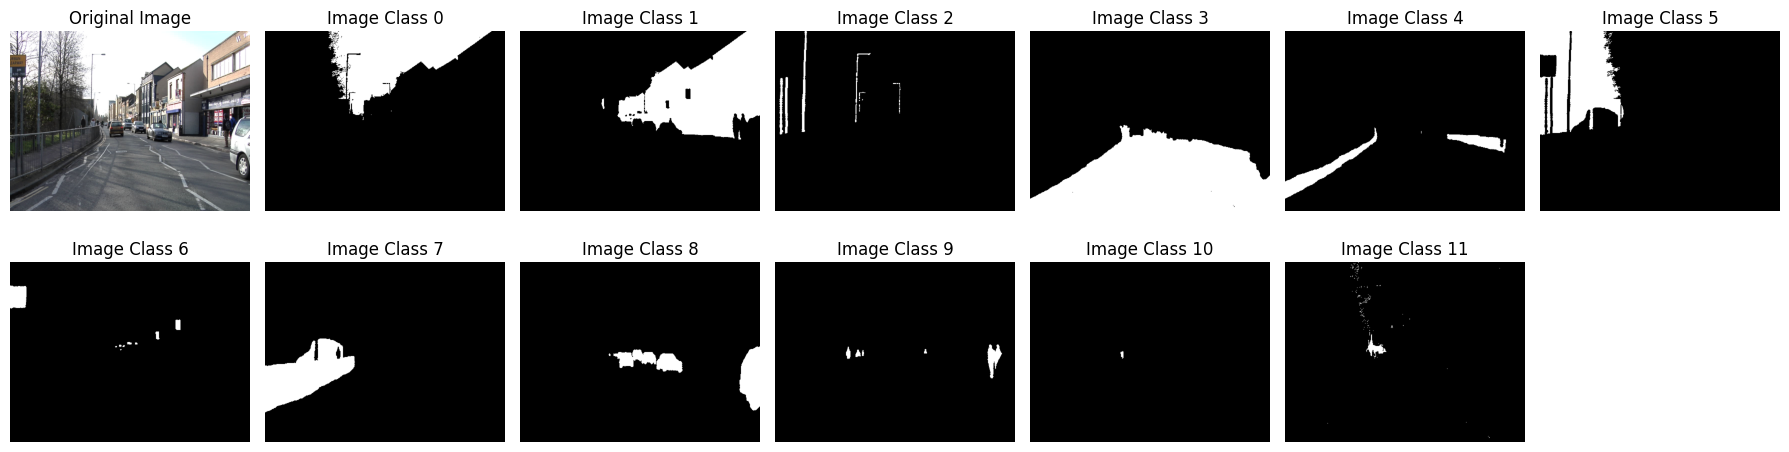

In [ ]:
#  select image want to show
selected_image = train_image_list[120]

# get image and annotation path
image_path = os.path.join(imageTrain_path, image_file)
annotation_path = os.path.join(annotationTrain_path, image_file)

# read image and annotation
image = cv2.imread(image_path)
annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)

# set up ploting columns
unique_values = np.unique(annotation)
ncols2 = len(unique_values) + 1
ncols1 = ceil(ncols2 / 2)
ncols2 = ncols2 - ncols1

# visualize image
plt.figure(figsize=(18, 5))

# show original image
plt.subplot(2, ncols1, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# show image in column 1
for i in range(ncols1):
  class_pixels = (annotation == unique_values[i]).astype(np.uint8) # get annotation pixels
  plt.subplot(2, ncols1, i + 2)
  plt.imshow(class_pixels, cmap='gray')
  plt.title(f'Image Class {unique_values[i]}')
  plt.axis('off')

# show image in column 2
for i in range(ncols2):
  idx = ncols1 + i + 1
  class_pixels = (annotation == unique_values[idx-2]).astype(np.uint8) # get annotation pixels
  plt.subplot(2, ncols1, idx)
  plt.imshow(class_pixels, cmap='gray')
  plt.title(f'Image Class {unique_values[idx-2]}')
  plt.axis('off')

plt.tight_layout()
plt.show()

**Class labels:**

0. Sky
1. Building
2. Pole
3. Road
4. Pavement
5. Tree
6. SignSymbol
7. Fence
8. Car
9. Pedestrian
10. Bicyclist
11. Void

# Resizing image

In [7]:
# get image data from path
def getImageData(imagePath, anotPath, image_file):
  # get image and annotation path
  image_path = os.path.join(imagePath, image_file)
  annotation_path = os.path.join(anotPath, image_file)

  # read image and annotation
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  annotation = cv2.imread(annotation_path, cv2.IMREAD_GRAYSCALE)

  return image, annotation

In [8]:
# get dataset content file
image_train_set = []
mask_train_set = []
image_test_set = []
mask_test_set = []

# Train
for image_file in train_image_list:
  image, annotation = getImageData(imageTrain_path, annotationTrain_path, image_file)
  image_train_set.append(image)
  mask_train_set.append(annotation)

# Test
for image_file in test_image_list:
  image, annotation = getImageData(imageTest_path, annotationTest_path, image_file)
  image_test_set.append(image)
  mask_test_set.append(annotation)

In [9]:
# Resizing image to 256, 256
image_train_set = [cv2.resize(image, (256, 256)) for image in image_train_set]
mask_train_set = [cv2.resize(image, (256, 256)) for image in mask_train_set]
image_test_set = [cv2.resize(image, (256, 256)) for image in image_test_set]
mask_test_set = [cv2.resize(image, (256, 256)) for image in mask_test_set]

In [10]:
# convert list to numpy array
image_train_set = np.array(image_train_set)
mask_train_set = np.array(mask_train_set)
image_test_set = np.array(image_test_set)
mask_test_set = np.array(mask_test_set)

# Add additional dimensions to the mask array
mask_train_set = np.expand_dims(mask_train_set, axis=-1)
mask_test_set = np.expand_dims(mask_test_set, axis=-1)

# show dataset shape
print('Original Images Train Shape', image_train_set.shape)
print('Annotation Images Train Shape', mask_train_set.shape)
print('\nOriginal Images Test Shape', image_test_set.shape)
print('Annotation Images Test Shape', mask_test_set.shape)

Original Images Train Shape (367, 256, 256, 3)
Annotation Images Train Shape (367, 256, 256, 1)

Original Images Test Shape (101, 256, 256, 3)
Annotation Images Test Shape (101, 256, 256, 1)


# Split dataset train for validation

In [11]:
# split train dataset for get validation data
image_train_set, image_valid_set, mask_train_set, mask_valid_set = \
  train_test_split(image_train_set, mask_train_set, test_size=0.2, random_state=42)

# show dataset shape
print('Original Images Train Shape', image_train_set.shape)
print('Annotation Images Train Shape', mask_train_set.shape)
print('\nOriginal Images Valid Shape', image_valid_set.shape)
print('Annotation Images Valid Shape', mask_valid_set.shape)

Original Images Train Shape (293, 256, 256, 3)
Annotation Images Train Shape (293, 256, 256, 1)

Original Images Valid Shape (74, 256, 256, 3)
Annotation Images Valid Shape (74, 256, 256, 1)


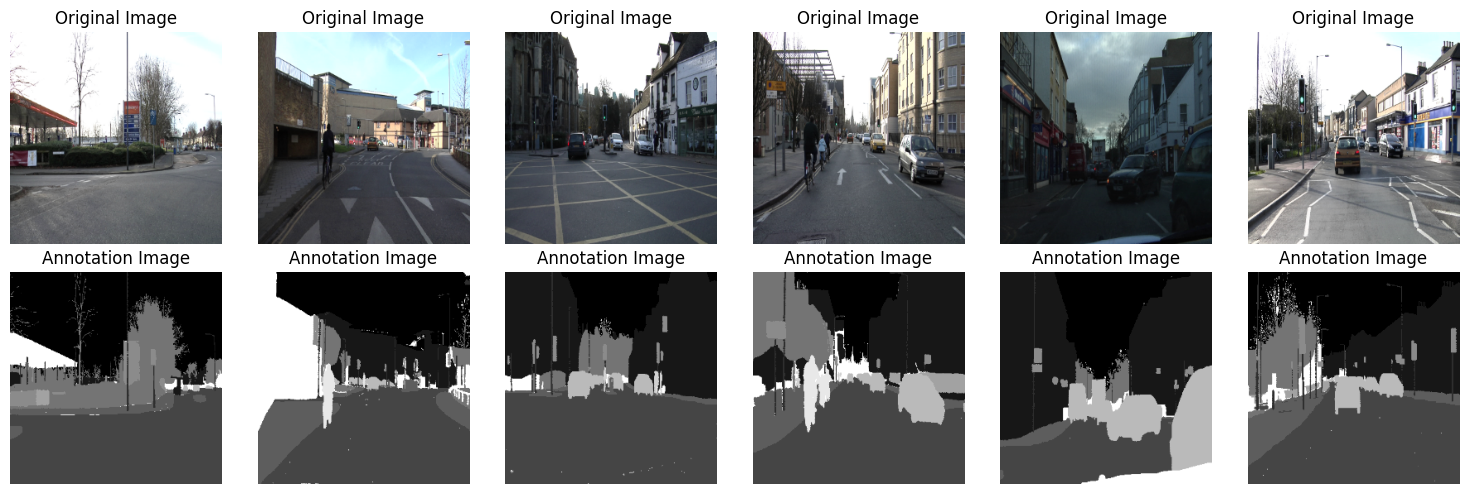

In [11]:
# Check the training and annotation datasets to verify if they match
num_range = 6
random_indices = random.sample(range(len(image_train_set)), num_range)

# visualize image
plt.figure(figsize=(15, 5))

# show image in column 1
for i, idx in enumerate(random_indices):
  plt.subplot(2, 6, i+1)
  plt.imshow(cv2.cvtColor(image_train_set[idx], cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')

# show image in column 2
for i, idx in enumerate(random_indices):
  plt.subplot(2, 6, i+1+num_range)
  plt.imshow(mask_train_set[idx], cmap='gray')
  plt.title('Annotation Image')
  plt.axis('off')

plt.tight_layout()
plt.show()

> training and annotation datasets is match after splitting

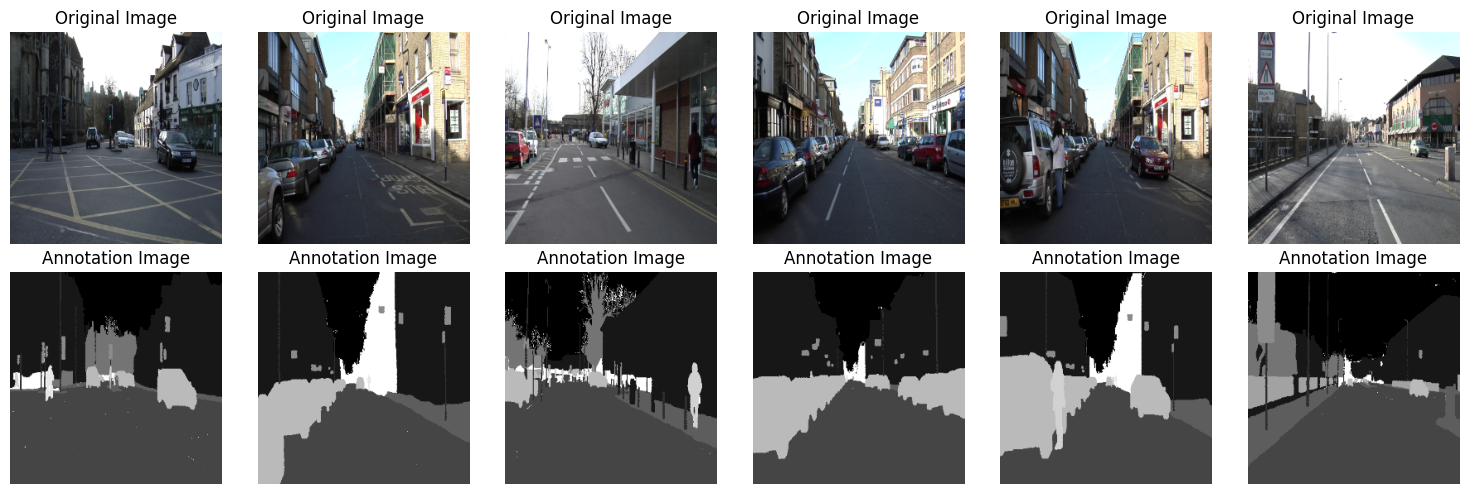

In [ ]:
# Check the validation and annotation datasets to verify if they match
num_range = 6
random_indices = random.sample(range(len(image_valid_set)), num_range)

# visualize image
plt.figure(figsize=(15, 5))

# show image in column 1
for i, idx in enumerate(random_indices):
  plt.subplot(2, 6, i+1)
  plt.imshow(cv2.cvtColor(image_valid_set[idx], cv2.COLOR_BGR2RGB))
  plt.title('Original Image')
  plt.axis('off')

# show image in column 2
for i, idx in enumerate(random_indices):
  plt.subplot(2, 6, i+1+num_range)
  plt.imshow(mask_valid_set[idx], cmap='gray')
  plt.title('Annotation Image')
  plt.axis('off')

plt.tight_layout()
plt.show()

> validation and annotation datasets is match after splitting

# Data Augmentation

In [12]:
# setup augmented tranform for Train dataset
transform = A.Compose([
    A.Rotate(p=0.5, limit=45),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomGamma(p=0.2)
])

# inisialize list for add new augmented images
image_train_augmented = []
mask_train_augmented = []

# generate augmentation image
for image, mask in zip(image_train_set, mask_train_set):
  augmented = transform(image=image, mask=mask)
  train_augmented_image = augmented['image']
  train_augmented_mask = augmented['mask']

  image_train_augmented.append(train_augmented_image)
  mask_train_augmented.append(train_augmented_mask)

# convert to numpy array
image_train_augmented = np.array(image_train_augmented)
mask_train_augmented = np.array(mask_train_augmented)

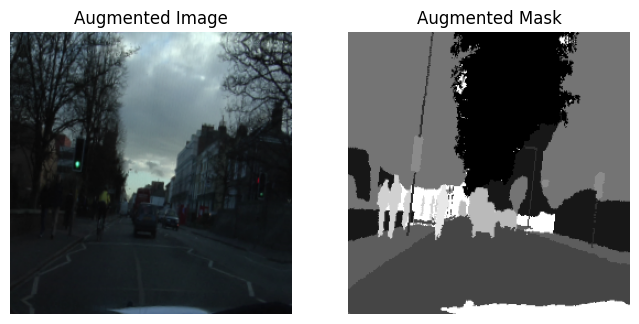

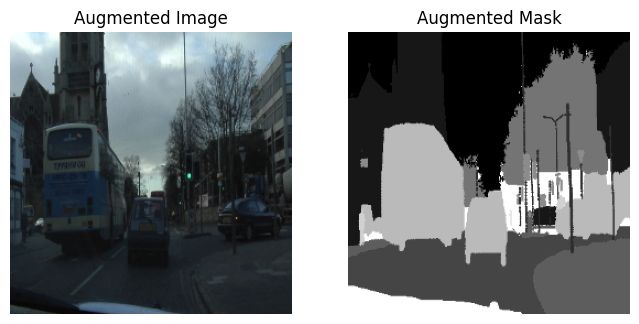

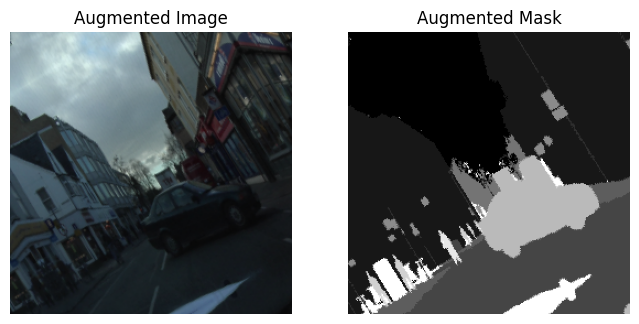

In [13]:
# get random range
random_indices = random.sample(range(len(image_train_augmented)), 3)

for i in random_indices:
  plt.figure(figsize=(8, 8))

  # Augmented Original Image
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(image_train_augmented[i], cv2.COLOR_BGR2RGB), vmin=0, vmax=1)
  plt.title('Augmented Image')
  plt.axis('off')

  # Augmented Mask Image
  plt.subplot(1, 2, 2)
  plt.imshow(mask_train_augmented[i], cmap='gray')
  plt.title('Augmented Mask')
  plt.axis('off')

  plt.show()

In [14]:
# setup tranform for normalize all of original image
transform = A.Compose([
    A.Normalize(mean=0.0, std=1.0, always_apply=True)
])

image_train_augmented = [transform(image=image)['image'] for image in image_train_augmented]
image_valid_set = [transform(image=image)['image'] for image in image_valid_set]
image_test_set = [transform(image=image)['image'] for image in image_test_set]

# convert to numpy array
image_train_augmented = np.array(image_train_augmented)
image_valid_set = np.array(image_valid_set)
image_test_set = np.array(image_test_set)

In [15]:
# mask one-hot-encoding
mask_train_augmented = tf.keras.utils.to_categorical(mask_train_augmented, num_classes=12)
mask_valid_set = tf.keras.utils.to_categorical(mask_valid_set, num_classes=12)
mask_test_set = tf.keras.utils.to_categorical(mask_test_set, num_classes=12)

# Modeling FCN-8

In [16]:
# Input
inputs = tf.keras.layers.Input(shape=(256, 256, 3))

# Encoder
encoder = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_tensor=inputs)

# Decoder
def fcn8_decoder(convs, n_classes):
  f1, f2, f3, f4, p5 = convs
  n = 4096

  c6 = tf.keras.layers.Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6")(p5)
  c7 = tf.keras.layers.Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7")(c6)

  f5 = c7
  # upsample the output of the encoder then crop extra pixels that were introduced
  o = tf.keras.layers.Conv2DTranspose(n_classes , kernel_size=(4,4) ,  strides=(2,2) , use_bias=False )(f5)
  o = tf.keras.layers.Cropping2D(cropping=(1,1))(o)

  # load the pool 4 prediction and do a 1x1 convolution to reshape it to the same shape of `o` above
  o2 = f4
  o2 = ( tf.keras.layers.Conv2D(n_classes , ( 1 , 1 ) , activation='relu' , padding='same'))(o2)

  # add the results of the upsampling and pool 4 prediction
  o = tf.keras.layers.Add()([o, o2])

  # upsample the resulting tensor of the operation you just did
  o = (tf.keras.layers.Conv2DTranspose( n_classes , kernel_size=(4,4) ,  strides=(2,2) , use_bias=False ))(o)
  o = tf.keras.layers.Cropping2D(cropping=(1, 1))(o)

  # load the pool 3 prediction and do a 1x1 convolution to reshape it to the same shape of `o` above
  o2 = f3
  o2 = ( tf.keras.layers.Conv2D(n_classes , ( 1 , 1 ) , activation='relu' , padding='same'))(o2)

  # add the results of the upsampling and pool 3 prediction
  o = tf.keras.layers.Add()([o, o2])

  # upsample up to the size of the original image
  o = tf.keras.layers.Conv2DTranspose(n_classes , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False )(o)

  # append a softmax to get the class probabilities
  o = (tf.keras.layers.Activation('softmax'))(o)

  return o

In [17]:
# Prepare model
n_classes = 12

# get vgg-16 encoder result maxpooling layer
selected_layers = [encoder.layers[3], encoder.layers[6], encoder.layers[10], encoder.layers[14], encoder.layers[18]]
partial_models = [layer.output for layer in selected_layers]

# get decoder
output = fcn8_decoder(partial_models, n_classes)

# Create the FCN-16 model
fcn8_model = tf.keras.Model(inputs=inputs, outputs=output)

# Training

In [18]:
def dice_coef(y_true, y_pred, smooth=100):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
  return dice

def dice_loss(y_true, y_pred):
  return 1 - dice_coef(y_true, y_pred)

def iou(y_true, y_pred, smooth=1e-7):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1, 2, 3])
  union = K.sum(y_true, axis=[1, 2, 3]) + K.sum(y_pred, axis=[1, 2, 3]) - intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

In [19]:
# Architecture
learning_rates = 1e-5
optimizers = tf.keras.optimizers.Adam(learning_rate=learning_rates)
loss_function = dice_loss

fcn8_model.compile(optimizer=optimizers, loss=loss_function, metrics=[dice_coef, iou])

In [20]:
# Model Train
num_epoch = 50
num_bacth_size = 32

history = fcn8_model.fit(image_train_augmented, mask_train_augmented, batch_size=num_bacth_size, epochs=num_epoch, validation_data=(image_valid_set, mask_valid_set))

Epoch 1/50
10/10 [==============================] - 69s 3s/step - loss: 0.9114 - dice_coef: 0.0893 - iou: 0.0467 - val_loss: 0.9058 - val_dice_coef: 0.0944 - val_iou: 0.0495
Epoch 2/50
10/10 [==============================] - 10s 1s/step - loss: 0.9011 - dice_coef: 0.0994 - iou: 0.0523 - val_loss: 0.8941 - val_dice_coef: 0.1063 - val_iou: 0.0561
Epoch 3/50
10/10 [==============================] - 10s 1s/step - loss: 0.8893 - dice_coef: 0.1108 - iou: 0.0587 - val_loss: 0.8819 - val_dice_coef: 0.1189 - val_iou: 0.0632
Epoch 4/50
10/10 [==============================] - 10s 1s/step - loss: 0.8790 - dice_coef: 0.1215 - iou: 0.0647 - val_loss: 0.8725 - val_dice_coef: 0.1286 - val_iou: 0.0687
Epoch 5/50
10/10 [==============================] - 10s 1s/step - loss: 0.8704 - dice_coef: 0.1301 - iou: 0.0696 - val_loss: 0.8642 - val_dice_coef: 0.1373 - val_iou: 0.0737
Epoch 6/50
10/10 [==============================] - 11s 1s/step - loss: 0.8628 - dice_coef: 0.1370 - iou: 0.0736 - val_loss: 0.856

# Visualize history training

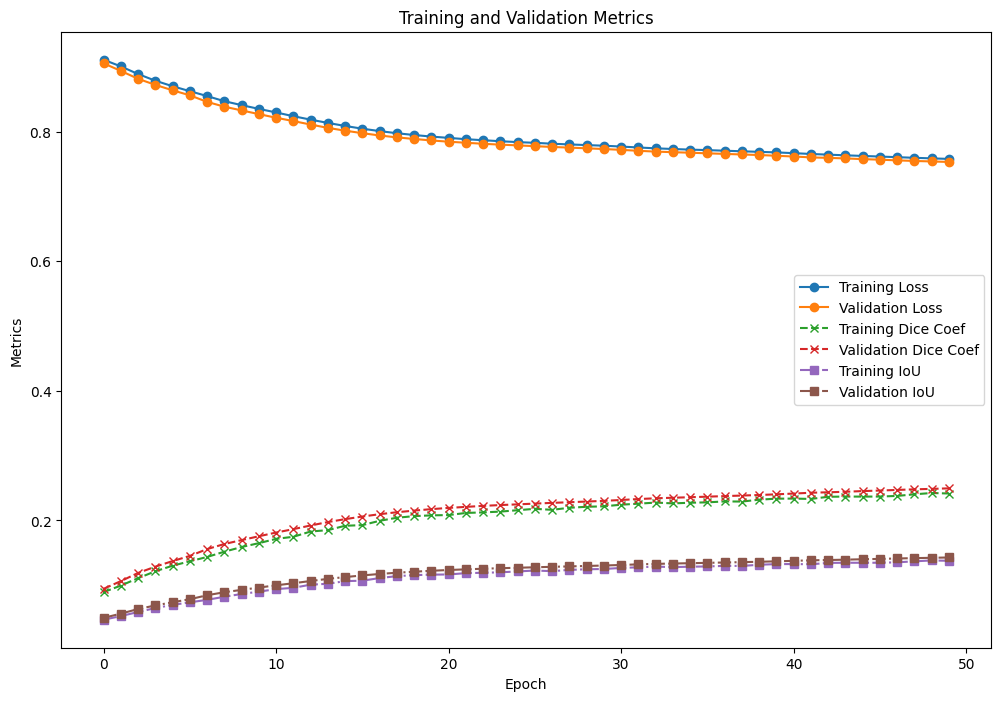

In [21]:
history = history.history

plt.figure(figsize=(12, 8))

# Plot Training and Validation Loss
plt.plot(history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history['val_loss'], label='Validation Loss', linestyle='-', marker='o')

# Plot Training and Validation Dice Coef
plt.plot(history['dice_coef'], label='Training Dice Coef', linestyle='--', marker='x')
plt.plot(history['val_dice_coef'], label='Validation Dice Coef', linestyle='--', marker='x')

# Plot Training and Validation IoU
plt.plot(history['iou'], label='Training IoU', linestyle='-.', marker='s')
plt.plot(history['val_iou'], label='Validation IoU', linestyle='-.', marker='s')

# Set labels and title
plt.title('Training and Validation Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metrics')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Testing

In [22]:
# Get evaluate data
results = fcn8_model.evaluate(image_test_set, mask_test_set, batch_size=num_bacth_size)

# Show result evaluate
print("Test Loss:", results[0])
print("Test IoU:", results[1])
print("Test Dice:", results[2])

4/4 [==============================] - 1s 295ms/step - loss: 0.7709 - dice_coef: 0.2299 - iou: 0.1299
Test Loss: 0.7708649635314941
Test IoU: 0.22992058098316193
Test Dice: 0.12988105416297913


1/1 [==============================] - 1s 1s/step


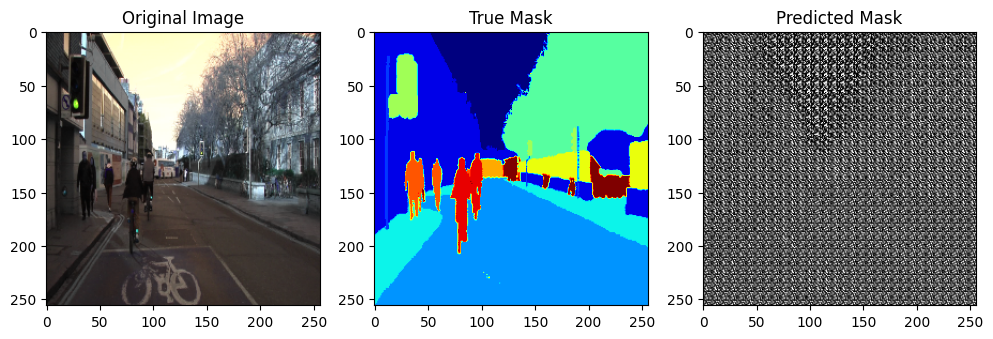

In [23]:
# Get prediction data
image_to_predict = np.expand_dims(image_test_set[0], axis=0)
predictions = fcn8_model.predict(image_to_predict)

# for i in selected_examples:
mask_original_test = np.argmax(mask_test_set[0], axis=-1)
mask_predict_test = np.argmax(predictions, axis=-1)

mask_predict_test = np.squeeze(mask_predict_test, axis=0)

# # Original Image
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_test_set[0])
plt.title("Original Image")

# Original Mask
plt.subplot(1, 3, 2)
plt.imshow(mask_original_test, cmap="jet")
plt.title("True Mask")

# Predict Mask
plt.subplot(1, 3, 3)
plt.imshow(mask_predict_test, cmap="gray")
plt.title("Predicted Mask")

plt.show()